In [1]:
import copy
import math
import numpy as np

class Node:
    def __init__(self, pos, target, maze, cost, h, parent):
        self.pos = pos #list of position of starting (x,y)
        self.target = target #list of position of Exit (x,y)
        self.maze = maze #maze
        self.cost = cost
        self.h = h
        self.parent = parent
        self._maze = np.array(maze) 
        self.nrows = len(self._maze) #maze dimension
        self.ncols = len(self._maze[0])
        self.valid = True
          
        for r in self._maze:
            if len(r) != self.ncols :
                print('Invalid maze: We need a complete square maze.')
                self.valid = False
        
        if self.valid:
            print(self._maze[target[0], target[1]])
            if self._maze[target[0], target[1]] == 0:
                print('Invalid exit: The Exit cannot be blocked.')
                self.valid = False
            if self._maze[pos[0], pos[1]] == 0:
                print('Invalid rat: The rat must be on a free path')
                self.valid = False
            
actionList = [ 'up','left','right','down' ]  # List of string representing actions
visited = [] #List of explored point

# measure heuristic function for each node, return h: approximated distance to goal
def heuristic(node):
    #print('heuristic')
    pos = node.pos
    target = node.target

    # measure the heuristic function of "map"
    x = abs(pos[0]-target[0])
    y = abs(pos[1]-target[1])
    
    if pos in visited: #Prevent come back to the previous point
        h1 = math.inf
    else:
        #h1 = x + y           #manhattan
        h1 = 2*max(x,y)      #diagonal
    
    return(h1)
    
# Map node and action to its adjacent node by using the set of rules
def transition(node, action):
    maze = copy.deepcopy(node.maze)
    pos = node.pos.copy()
    cost = node.cost
    _maze = node._maze
    
    
    # function that maps (node, action) to its result
    #itself is not the top point and the top point is not blocked.
    if action == 'up' and pos[1] != 0 and _maze[pos[0], pos[1]-1] != 0:
        pos[1] -= 1
        
    #itself is not the leftmost point and the leftmost point is not blocked.
    if action == 'left' and pos[0] != 0 and _maze[pos[0]-1, pos[1]] != 0:
        pos[0] -= 1
    
    #itself is not the rightmost point and the rightmost point is not blocked.
    if action == 'right' and pos[0] != (node.nrows-1) and _maze[pos[0]+1, pos[1]] != 0:
        pos[0] += 1
    
    #itself is not the bottom point and the bottom point is not blocked.
    if action == 'down' and pos[1] != (node.ncols-1) and _maze[pos[0], pos[1]+1] != 0:
        pos[1] += 1      
        
    # create a new node
    child = Node(pos, node.target, maze, cost+1, math.inf, node)
    
    # measure 
    if pos != node.pos:
        child.h = heuristic(child)
        if child.pos not in visited:
            visited.append(child.pos)
    else:
        child.pos = None 
    
    return(child)

# from node, expand all adjacent nodes by using transition
def expand(node):
    listNextNode = []
    for action in actionList:
        child = transition(node, action)
        if child.pos != None:
            listNextNode.append(child)
    return(listNextNode)

# Check whether the node is a goal or not
def goalCheck(node):
    check = False
    pos = node.pos #current position
    target = node.target #exit position
    
    # logical condition for checking if the node is a goal or not
    # If yes, modify check = True
    if pos == target:
        check = True
    
    return(check)

# print the sequence of node from root to goal
def printsolution(solution):
    for node in solution:
        pos = node.pos.copy()
        print([pos[0]+1, pos[1]+1], node.h,'\n') #print real positioni
        
def solutionlist(solution):
    sollist=[]
    for node in solution:
        pos = node.pos.copy()
        sollist.append([pos[0], pos[1]])
    return sollist 

# Sort the list of nodes in frontier by thier f(n) value
def sortevaluation(frontier):
    newfrontier = []
    
    while len(frontier) > 0 :
        min_f = math.inf
        min_i = 0
        for i in range(len(frontier)):
            node = frontier[i]
            
            # Evaluation function
            # default : A*
            # delete node.cost : greedy best-first
            f =  node.cost + node.h
            if f< min_f:
                min_f = f
                min_i = i
        newfrontier.append(frontier.pop(min_i))
    return(newfrontier)


        
# Run search algorithm
def solve(initial):
    frontier = [initial]
    solution = 0
    while True:
        if len(frontier) == 0: #if not have anything to solve
            
            solution = []
            break
        else:
            # get one node out of the frontier
            # Default is BFS
            # Change it to .pop() means getting last node, the algorithm is DFS
            node = frontier.pop(0)
            print('position = ',node.pos ,  ' ,cost = ',node.cost, ' ,h = ',node.h, ' ,frontier = ',len(frontier),'\n')
            
            if goalCheck(node):
                # return the path to the goal: reverse list of parent nodes
                # generate path
                path = [node]
                while node.parent != None : #หาเพิ่ม
                    path.insert(0, node.parent)
                    node = node.parent
                
                solution = path
                break
            #when all point have been expanded and not found any exit 
            elif len(visited) != 0 and node.h == math.inf:
                print("No exit!!!")
                solution = None
                break
            else:
                frontier = frontier + expand(node)
                
                # sort the frontier if using heuristic search: 
                # Default = heuristic search
                #disable = blind search
                frontier = sortevaluation(frontier)
                
                
    return solution 




# setup the initial state manually
maze = [
    [ 1.,  0.,  1.,  1.,  1.,  1.],
    [ 1.,  0.,  1.,  1.,  1.,  0.],
    [ 1.,  1.,  1.,  1.,  0.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  0.,  1.,  1.,  1.],
    [ 1.,  1.,  1.,  0.,  1.,  0.],
    [ 1.,  1.,  1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  1.,  0.,  1.]
]
startNode = Node([0,0], [6,2], maze, 0, math.inf, None)
#mouse,exit
#No error occurred.

if startNode.valid:
    solution = solve(startNode)
    print("this the path to solution")
    printsolution(solution)
    sollist=solutionlist(solution)
    print(sollist)

1.0
position =  [0, 0]  ,cost =  0  ,h =  inf  ,frontier =  0 

1.0
1.0
1.0
1.0
position =  [1, 0]  ,cost =  1  ,h =  10  ,frontier =  0 

1.0
1.0
1.0
1.0
position =  [2, 0]  ,cost =  2  ,h =  8  ,frontier =  1 

1.0
1.0
1.0
1.0
position =  [3, 0]  ,cost =  3  ,h =  6  ,frontier =  3 

1.0
1.0
1.0
1.0
position =  [4, 0]  ,cost =  4  ,h =  4  ,frontier =  5 

1.0
1.0
1.0
1.0
position =  [5, 0]  ,cost =  5  ,h =  4  ,frontier =  7 

1.0
1.0
1.0
1.0
position =  [5, 1]  ,cost =  6  ,h =  2  ,frontier =  9 

1.0
1.0
1.0
1.0
position =  [4, 1]  ,cost =  5  ,h =  4  ,frontier =  12 

1.0
1.0
1.0
1.0
position =  [6, 1]  ,cost =  7  ,h =  2  ,frontier =  14 

1.0
1.0
1.0
1.0
position =  [6, 2]  ,cost =  8  ,h =  0  ,frontier =  17 

this the path to solution
[1, 1] inf 

[2, 1] 10 

[3, 1] 8 

[4, 1] 6 

[5, 1] 4 

[6, 1] 4 

[6, 2] 2 

[7, 2] 2 

[7, 3] 0 

[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [5, 1], [6, 1], [6, 2]]


Bam

In [2]:
from __future__ import print_function
import os, sys, time, datetime, json, random
import numpy as np
#from keras.models import Sequential
#from keras.layers.core import Dense, Activation
#from keras.optimizers import SGD , Adam, RMSprop
#from keras.layers.advanced_activations import PReLU
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
for i,j in sollist :
    m = i
    n = j
    maze[m][n]=0.5
mouse=startNode.pos
cheese=startNode.target
m,n=mouse[0],mouse[1]
a,b=cheese[0],cheese[1]
maze[m][n]=0.3
maze[a][b]=0.9    
print (maze)


[[0.3, 0.0, 1.0, 1.0, 1.0, 1.0], [0.5, 0.0, 1.0, 1.0, 1.0, 0.0], [0.5, 1.0, 1.0, 1.0, 0.0, 1.0], [0.5, 1.0, 1.0, 0.0, 1.0, 1.0], [0.5, 1.0, 0.0, 1.0, 1.0, 1.0], [0.5, 0.5, 1.0, 0.0, 1.0, 0.0], [1.0, 0.5, 0.9, 0.0, 1.0, 1.0], [1.0, 1.0, 1.0, 1.0, 0.0, 1.0]]


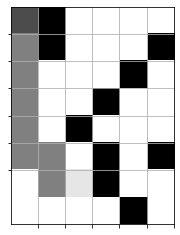

In [4]:
def bamshow(maze):
    plt.grid('on')
    nrows, ncols = len(maze),len(maze[0])
    ax = plt.gca()
    ax.set_xticks(np.arange(0.5, nrows, 1))
    ax.set_yticks(np.arange(0.5, ncols, 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    canvas = np.copy(maze)
    img = plt.imshow(canvas, interpolation='none', cmap='gray')
    return img
bamshow(maze)